In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Nan, Null
np.nan

nan

In [2]:
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,np.nan,85]
science = [78,75,np.nan,np.nan,76]

mydict = {"name":name,"math":math,"science":science}
df = pd.DataFrame(mydict)

In [4]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


## Missing Values

In [5]:
df.isnull()

,name,math,science
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,True
4,False,False,False


### *Dropna

In [6]:
# column-wise null count
df.isnull().sum()

name       0
math       1
science    2
dtype: int64

In [7]:
# drop row containing null values 

df.dropna()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [8]:
# drop column containing null values

df.dropna(axis=1)

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


### *Fillna

In [9]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [9]:
df.fillna(0)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,0.0
3,kenny,0.0,0.0
4,kevin,85.0,76.0


In [11]:
# Central Tendency - mean, median, mode
# - continous - mean
# - categorical - median, mode


In [11]:
math_mean = df['math'].mean()
sci_mean = df['science'].mean()

In [12]:
math_mean

79.75

In [13]:
sci_mean

76.33333333333333

In [15]:
df["math"].fillna(math_mean, inplace=True)
df["science"].fillna(sci_mean, inplace=True)

In [14]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


## Unwanted values

In [15]:
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,"?",85]
science = [78,75,76,77,76]

mydict = {"name":name,"math":math,"science":science}

In [16]:
df = pd.DataFrame(mydict)

In [17]:
df

,name,math,science
0,john,89,78
1,jack,78,75
2,jill,67,76
3,kenny,?,77
4,kevin,85,76


In [18]:
# isnull won't work
df.isnull().sum()

name       0
math       0
science    0
dtype: int64

In [19]:
df.info()
# math col set as object insted of int datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
name       5 non-null object
math       5 non-null object
science    5 non-null int64
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


In [20]:
df["math"]

0    89
1    78
2    67
3     ?
4    85
Name: math, dtype: object

In [23]:
df["math"].unique()

array([89, 78, 67, '?', 85], dtype=object)

In [21]:
for data in df["math"]:
    if not(str(data).isnumeric()):
        print(data)

?


In [22]:
## Replace "?"

In [23]:
df["math"].replace("?",np.nan, inplace=True)

In [24]:
df["math"]

0    89.0
1    78.0
2    67.0
3     NaN
4    85.0
Name: math, dtype: float64

In [28]:
math_mean = df["math"].mean()
math_mean

79.75

In [25]:
df["math"].fillna(math_mean,inplace=True)

In [26]:
df

,name,math,science
0,john,89.00,78
1,jack,78.00,75
2,jill,67.00,76
3,kenny,79.75,77
4,kevin,85.00,76


## Drop rows and columns as per choice

In [29]:
df

,name,math,science
0,john,89.00,78
1,jack,78.00,75
2,jill,67.00,76
3,kenny,79.75,77
4,kevin,85.00,76


In [32]:
# drop by index
df.drop(4)

,name,math,science
0,john,89.00,78
1,jack,78.00,75
2,jill,67.00,76
3,kenny,79.75,77


In [33]:
# drop muntiple rows
df.drop([0,1])

,name,math,science
2,jill,67.00,76
3,kenny,79.75,77
4,kevin,85.00,76


In [34]:
# drop by columns
df.drop("science",axis=1)

,name,math
0,john,89.00
1,jack,78.00
2,jill,67.00
3,kenny,79.75
4,kevin,85.00


In [32]:
# drop multiple columns
df.drop(["math","science"],axis=1)

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


In [33]:
# Cars dataset

In [3]:
cars = pd.read_csv("cars.csv")

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [36]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null int64
horsepower           205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [5]:
cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
cat_col = cars.select_dtypes("object").columns
cat_col

Index(['normalized-losses', 'make', 'fuel-type', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'horsepower'],
      dtype='object')

In [18]:
# list the column which are numeric but show as object dtype. 
for col in cars[['normalized-losses', 'horsepower']]:
    print(col)
    for data in cars[col]:
        if not(str(data).isnumeric()):
            print(data ,end="")
    print()

normalized-losses
?????????????????????????????????????????
horsepower
??


In [6]:
for data in cars["normalized-losses"]:
    if not(str(data).isnumeric()):
        print(data, end="")

?????????????????????????????????????????

In [41]:
for data in cars["horsepower"]:
    if not(str(data).isnumeric()):
        print(data ,end="")

??

In [43]:
cars["normalized-losses"].replace("?",np.nan,inplace=True)
cars["normalized-losses"].head()
# still datatype is object

0    NaN
1    NaN
2    NaN
3    164
4    164
Name: normalized-losses, dtype: object

In [44]:
cars["normalized-losses"] = cars["normalized-losses"].astype("float")

In [45]:
cars["normalized-losses"].fillna(cars["normalized-losses"].mean(),inplace=True)

In [46]:
cars["normalized-losses"].head()

0    122.0
1    122.0
2    122.0
3    164.0
4    164.0
Name: normalized-losses, dtype: float64

In [47]:
# For Horsepower
cars["horsepower"].replace("?",np.nan,inplace=True)
cars["horsepower"].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: object

In [48]:
cars["horsepower"] = cars["horsepower"].astype("float")
cars["horsepower"].head()

0    111.0
1    111.0
2    154.0
3    102.0
4    115.0
Name: horsepower, dtype: float64

In [49]:
cars["horsepower"].fillna(cars["horsepower"].mean(),inplace=True)

In [50]:
cars["horsepower"].head()

0    111.0
1    111.0
2    154.0
3    102.0
4    115.0
Name: horsepower, dtype: float64

## Outliers

In [50]:
# Boxplot 
# check the outlier on target here cars price
# check outlier with two variables

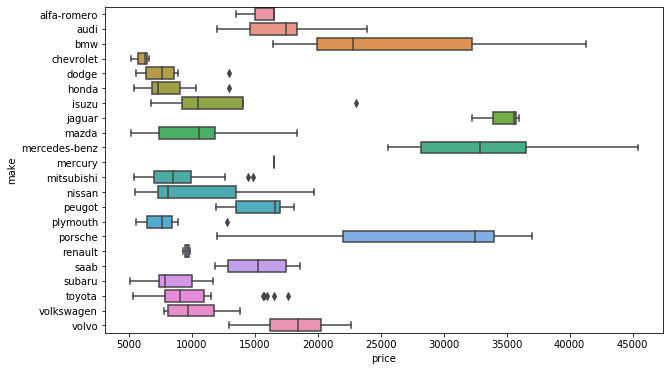

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(x="price",y="make",data=cars)
plt.show()

In [52]:
cars[(cars["make"] == "toyota") & (cars["price"] > 15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [53]:
cars.drop([172,178,179,180,181],inplace=True)

In [54]:
cars[(cars["make"] == "isuzu") & (cars["price"] > 22000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [55]:
cars.drop([45],inplace=True)

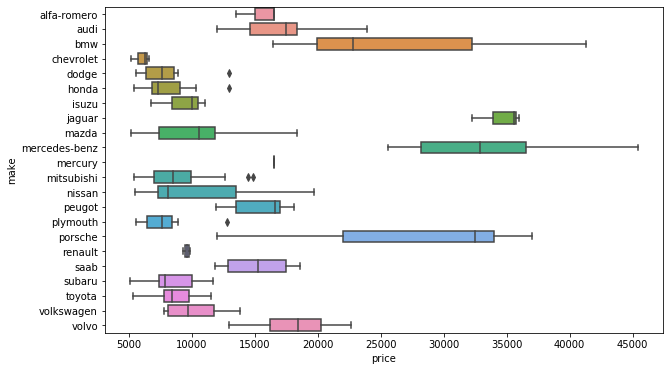

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x="price",y="make",data=cars)
plt.show()

## Handling categorical data

In [57]:
# separate  numerical and categorical data

In [57]:
cars_cat = cars.select_dtypes(object)

In [58]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [59]:
cars_num = cars.select_dtypes(["float64","int64"])

In [60]:
cars_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


## Take care of categorical data by
## - Label encoding
## - one hot encoding

In [64]:
cars_cat["make"].nunique()

22

In [65]:
# One hot encoding
# not the proper way to encode categorical class into many columns

In [66]:
pd.get_dummies(cars_cat["fuel-type"]).head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [67]:
pd.get_dummies(cars_cat["make"]).head()

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Label encoding

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le = LabelEncoder()

In [69]:
le.fit_transform(cars_cat["drive-wheels"])

array([2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [72]:
# apply for all columns

In [70]:
for col in cars_cat:
    le = LabelEncoder()
    cars_cat[col] = le.fit_transform(cars_cat[col])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


## Skewness

In [72]:
cars_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [73]:
from scipy.stats import skew

In [74]:
skew(cars_num["price"])

1.833958003138736

column:  symboling
skew:  0.21323314897251855


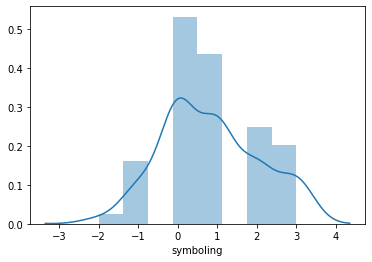

---------------------------------
column:  normalized-losses
skew:  0.84594732303092


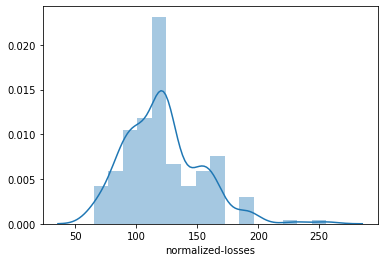

---------------------------------
column:  width
skew:  0.9174462035447307


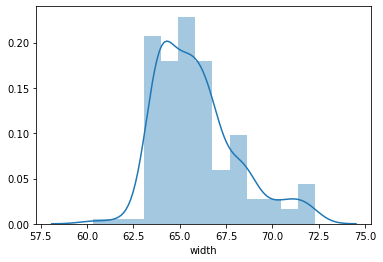

---------------------------------
column:  height
skew:  0.036252143473982396


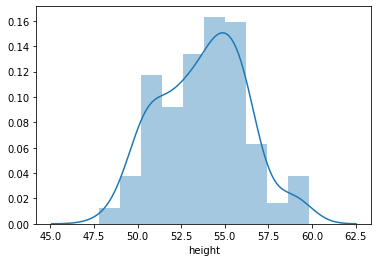

---------------------------------
column:  engine-size
skew:  2.014650224754104


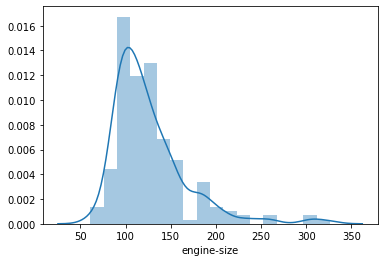

---------------------------------
column:  horsepower
skew:  1.4816868363024966


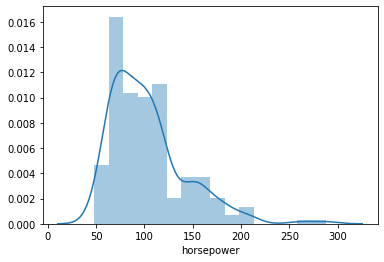

---------------------------------
column:  city-mpg
skew:  0.633498512160688


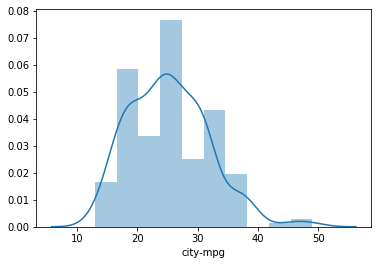

---------------------------------
column:  highway-mpg
skew:  0.5131240234054851


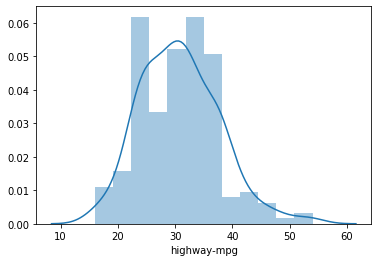

---------------------------------
column:  price
skew:  1.833958003138736


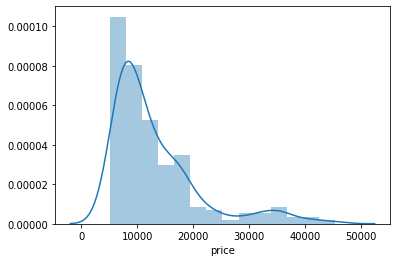

---------------------------------


In [76]:
for col in cars_num:
    print("column: ",col)
    print("skew: ",skew(cars_num[col]))
    
    plt.figure()
    sns.distplot(cars_num[col])
    plt.show()
    
    print("---------------------------------")

In [77]:
cars_num.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.441895,-0.255172,-0.545755,-0.120348,0.064716,-0.027495,0.045654,-0.089511
normalized-losses,0.441895,1.000000,0.068923,-0.365574,0.094535,0.185064,-0.211989,-0.167934,0.129392
width,-0.255172,0.068923,1.000000,0.283747,0.733867,0.640116,-0.638136,-0.673350,0.730253
height,-0.545755,-0.365574,0.283747,1.000000,0.072042,-0.107168,-0.047991,-0.109124,0.141306
engine-size,-0.120348,0.094535,0.733867,0.072042,1.000000,0.805793,-0.646658,-0.670043,0.865830
horsepower,0.064716,0.185064,0.640116,-0.107168,0.805793,1.000000,-0.801217,-0.765734,0.761606
city-mpg,-0.027495,-0.211989,-0.638136,-0.047991,-0.646658,-0.801217,1.000000,0.970589,-0.675322
highway-mpg,0.045654,-0.167934,-0.673350,-0.109124,-0.670043,-0.765734,0.970589,1.000000,-0.698829
price,-0.089511,0.129392,0.730253,0.141306,0.865830,0.761606,-0.675322,-0.698829,1.000000


In [ ]:
# Good correlation --> width,engine-size, city-mpg, highway-mpg
# not reduce skew why  --> because they have good correlation

In [ ]:
# bad correlation --> symbolling, normalized-losses, horsepower, height
# symbolling, height --> good skewness
# normalized-losses, horsepoer --> bad skewness and corrletion

In [ ]:
# reduce skewness  - sqrt, log

In [82]:
cars_num["normalized-losses"] = np.sqrt(cars_num["normalized-losses"])
cars_num["horsepower"] = np.sqrt(cars_num["horsepower"])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
skew(cars_num["normalized-losses"])

0.20535050333434857

In [84]:
skew(cars_num["horsepower"])

0.9548686863783177

In [ ]:
## Join both dataframe cars_cat and cars_num

In [86]:
cars_new = pd.concat([cars_num,cars_cat],axis=1)

In [88]:
cars_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,3.323456,64.1,48.8,130,10.535654,21,27,13495,0,1,0,2,0,0
1,3,3.323456,64.1,48.8,130,10.535654,21,27,16500,0,1,0,2,0,0
2,1,3.323456,65.5,52.4,152,12.409674,19,26,16500,0,1,2,2,0,5
3,2,3.578582,66.2,54.3,109,10.099505,24,30,13950,1,1,3,1,0,3
4,2,3.578582,66.4,54.3,136,10.723805,18,22,17450,1,1,3,0,0,3


In [ ]:
# More preprocessing
# - Scaling --> features(excluding target)
# - feature engineering

In [89]:
X = cars_new.drop("price",axis=1)
y = cars_new["price"]

In [90]:
X.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,3.323456,64.1,48.8,130,10.535654,21,27,0,1,0,2,0,0
1,3,3.323456,64.1,48.8,130,10.535654,21,27,0,1,0,2,0,0
2,1,3.323456,65.5,52.4,152,12.409674,19,26,0,1,2,2,0,5
3,2,3.578582,66.2,54.3,109,10.099505,24,30,1,1,3,1,0,3
4,2,3.578582,66.4,54.3,136,10.723805,18,22,1,1,3,0,0,3


In [91]:
y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

## What is Scaling ?
## - Two types
### - MinMaxScaler
### - StandardScaler

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [94]:
data = np.array([10,20,30,40,50])

In [ ]:
# MinMaxScaler

In [95]:
mm  = MinMaxScaler()

In [96]:
mm.fit_transform(data.reshape(-1,1))

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [ ]:
# StandardScaler

In [97]:
ss = StandardScaler()

In [98]:
ss.fit_transform(data.reshape(-1,1))

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [ ]:
# Scaling on X dataframe

In [101]:
for col in X:
    ss = StandardScaler()
    X[col] = ss.fit_transform(X[[col]])

In [102]:
X.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,1.773413,0.116027,-0.832941,-2.009243,0.092215,0.297058,-0.656888,-0.558921,-1.930714,0.334263,-3.119212,1.246692,-0.123718,-3.148455
1,1.773413,0.116027,-0.832941,-2.009243,0.092215,0.297058,-0.656888,-0.558921,-1.930714,0.334263,-3.119212,1.246692,-0.123718,-3.148455
2,0.139574,0.116027,-0.184011,-0.548198,0.620643,1.343119,-0.964105,-0.704886,-1.930714,0.334263,-0.740962,1.246692,-0.123718,1.970356
3,0.956494,1.344814,0.140454,0.222909,-0.412193,0.053604,-0.196063,-0.121026,-1.770559,0.334263,0.448163,-0.564196,-0.123718,-0.077168
4,0.956494,1.344814,0.233158,0.222909,0.236332,0.402083,-1.117713,-1.288746,-1.770559,0.334263,0.448163,-2.375084,-0.123718,-0.077168


## Feature engineering

In [104]:
# Feature Engineering : Technique of creating new feature from existing feature
# Eg. from latitude and longitude
# describe - distance

In [105]:
X["area"] = X["width"] * X["height"]

In [106]:
X.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,area
0,1.773413,0.116027,-0.832941,-2.009243,0.092215,0.297058,-0.656888,-0.558921,-1.930714,0.334263,-3.119212,1.246692,-0.123718,-3.148455,1.673581
1,1.773413,0.116027,-0.832941,-2.009243,0.092215,0.297058,-0.656888,-0.558921,-1.930714,0.334263,-3.119212,1.246692,-0.123718,-3.148455,1.673581
2,0.139574,0.116027,-0.184011,-0.548198,0.620643,1.343119,-0.964105,-0.704886,-1.930714,0.334263,-0.740962,1.246692,-0.123718,1.970356,0.100874
3,0.956494,1.344814,0.140454,0.222909,-0.412193,0.053604,-0.196063,-0.121026,-1.770559,0.334263,0.448163,-0.564196,-0.123718,-0.077168,0.031309
4,0.956494,1.344814,0.233158,0.222909,0.236332,0.402083,-1.117713,-1.288746,-1.770559,0.334263,0.448163,-2.375084,-0.123718,-0.077168,0.051973


## Apart from these all 
### Manual Preprocessing

In [19]:
car = ["audi","bmw","ferrari","tesla"]
distance = ["1000km","2000km","25000km","10000km"]
speed = ["200 km/h","300 km/h","400 km/h","200 miles/h"]

In [20]:
cars_dict = {"car":car,"distance":distance,"speed":speed}

In [21]:
df = pd.DataFrame(cars_dict)

In [22]:
df

,car,distance,speed
0,audi,1000km,200 km/h
1,bmw,2000km,300 km/h
2,ferrari,25000km,400 km/h
3,tesla,10000km,200 miles/h


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
car         4 non-null object
distance    4 non-null object
speed       4 non-null object
dtypes: object(3)
memory usage: 224.0+ bytes


In [24]:
for distance in df["distance"]:
    print(str(distance)[:-2])

1000
2000
25000
10000


In [25]:
def clean_distance(x):
    return int(str(x)[:-2])

In [26]:
df["distance"] = df["distance"].map(clean_distance)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
car         4 non-null object
distance    4 non-null int64
speed       4 non-null object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [20]:
for distance in df["speed"]:
    print(str(distance).split(" ")[0])

200
300
400
200


In [33]:
def clean_speed(y):
    temp = str(y).split()
    if temp[1] == "km/h":
        return float(temp[0])
    else:
        return float(temp[0]) * 1.6

In [34]:
df["speed"] = df["speed"].map(clean_speed)

IndexError: list index out of range

In [30]:
df["speed"]

0    200
1    300
2    400
3    200
Name: speed, dtype: int64

In [31]:
df

,car,distance,speed
0,audi,1000,200
1,bmw,2000,300
2,ferrari,25000,400
3,tesla,10000,200


In [32]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()

In [24]:
ss.fit_transform(df[["speed"]])

array([[-0.90453403],
       [ 0.30151134],
       [ 1.50755672],
       [-0.90453403]])